##  Project Title: Netflix Movies and TV Shows Clustering

###  Summary:

This project aimed to analyze the publicly available Netflix Titles dataset to uncover meaningful insights about the content offered on the platform and prepare the data for downstream tasks like predictive modeling.

The analysis began by exploring how content ratings vary across different countries, treating each country as an independent variable. We also investigated whether directors influence content ratings, cleaning the data to exclude unknown or missing values for a more accurate assessment.

To identify anomalies in the dataset, outlier detection was performed on three key areas: movie durations, number of titles directed by individuals, and the number of seasons in TV shows. These outliers were visually examined using box plots to better understand extreme cases in Netflix’s content catalog.

Following the exploratory phase, the dataset was transformed using feature encoding techniques to make it suitable for machine learning models. Label encoding was applied to categorical variables like `type` and `rating`. One-hot encoding was used for high-frequency countries, and genres were handled using multi-label binarization to account for multiple values per entry. Director names were frequency-encoded to capture their prevalence within the dataset.

By the end of the project, we developed a structured, enriched dataset that retains the original information while being numerically optimized for further analysis, such as classification or clustering. The project highlights how careful preprocessing and thoughtful feature engineering can uncover patterns in media data and prepare it for predictive tasks.


## **GitHub Link:** https://github.com/shishirvarun/Netflix-Movies-TV-Shows.git

##  Problem Statement

- **Exploratory Data Analysis**
  Performing EDA

- **Understanding what type of content is available in different countries**  
  Analyze the distribution of movies and TV shows across countries to identify regional content preferences and availability.

- **Assessing Netflix's content focus over time**  
  Investigate whether Netflix has been increasingly focusing on TV Shows rather than Movies in recent years by examining trends over time.


## **Importing all the Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Uploading the Dataset**

In [ ]:
df = pd.read_csv('netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## **DATA CLEANING**

In [ ]:
# Converting 'date_added' column to datetime type
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce') # Handle potential errors during conversion

df['day'] = df['date_added'].dt.day
df['month'] = df['date_added'].dt.month
df['year'] = df['date_added'].dt.year
df['month_name'] = df['date_added'].dt.month_name()
df['weekday'] = df['date_added'].dt.day_name()

In [ ]:
#Using explode() function to transform the data
df['director'] = df['director'].str.split(', ')
df = df.explode('director')
df['cast'] = df['cast'].str.split(', ')
df = df.explode('cast')
df['country'] = df['country'].str.split(',')
df = df.explode('country')
df['listed_in'] = df['listed_in'].str.split(', ')
df = df.explode('listed_in')
df.reset_index(inplace = True, drop = True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day,month,year,month_name,weekday
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2.0,3.0,2019.0,March,Saturday
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,2.0,3.0,2019.0,March,Saturday
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,2.0,3.0,2019.0,March,Saturday
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2.0,3.0,2019.0,March,Saturday


In [ ]:
# Filling NaN values before converting to integer
df['director'].fillna('Unknown', inplace= True)
df['cast'].fillna('Unknown', inplace= True)
df['country'].fillna('Unknown', inplace= True)
df.dropna(subset=['date_added'],inplace=True)
df.dropna(subset=['rating'],inplace=True)
df.dropna(subset=['duration'],inplace=True)
df['listed_in'].fillna('Unknown', inplace= True)

# Filling NaN values with 0
df['day'] = df['day'].fillna(0).astype(int) # Or any suitable default integer value
df['month'] = df['month'].fillna(0).astype(int)
df['year'] = df['year'].fillna(0).astype(int)
df.head()

df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day,month,year,month_name,weekday
122470,s5330,Movie,Chocolate City: Vegas Strip,Jean-Claude La Marre,Vivica A. Fox,United States,2017-08-12,2017,TV-MA,90 min,Dramas,The exotic dancers from Chocolate City get bac...,12,8,2017,August,Saturday
159680,s7025,TV Show,Humsafar,Unknown,Fawad Khan,Pakistan,2016-12-15,2011,TV-PG,1 Season,International TV Shows,"To fulfill her mother's dying wish, middle-cla...",15,12,2016,December,Thursday
137630,s6089,Movie,Acts of Violence,Brett Donowho,Cole Hauser,Canada,2020-08-01,2018,R,87 min,Action & Adventure,When his future sister-in-law is kidnapped by ...,1,8,2020,August,Saturday
87887,s3682,Movie,"River, el más grande siempre",Luis A. Scalella,Unknown,Argentina,2019-07-05,2019,TV-G,105 min,International Movies,Experience the highlights of Argentine soccer ...,5,7,2019,July,Friday
2706,s123,Movie,In the Cut,Jane Campion,Yaani King Mondschein,Australia,2021-09-02,2003,R,118 min,Thrillers,After embarking on an affair with the cop prob...,2,9,2021,September,Thursday
147303,s6507,TV Show,Club Friday The Series 8,Unknown,Toni Rakkaen,Unknown,2019-02-02,2017,TV-MA,8 Seasons,Romantic TV Shows,The eighth installment of this popular Thai se...,2,2,2019,February,Saturday
69405,s2919,Movie,The Ghost and the Tout,Charles Uwagbai,Toyin Abraham,Nigeria,2020-02-14,2018,TV-14,100 min,International Movies,"Boisterous hustler Isla, whose life consists o...",14,2,2020,February,Friday
52601,s2214,Movie,The Kissing Booth 2,Vince Marcello,Joel Courtney,United States,2020-07-24,2020,TV-14,133 min,Comedies,"With college decisions looming, Elle juggles h...",24,7,2020,July,Friday
53199,s2240,Movie,Sylvia,Daniel Oriahi,Omotunde Adebowale David,Nigeria,2020-07-15,2018,TV-14,104 min,International Movies,When a man outgrows a childhood friendship and...,15,7,2020,July,Wednesday
187313,s8195,Movie,The Apostate,Federico Veiroj,Álvaro Roig,France,2017-05-10,2015,TV-MA,80 min,Dramas,A young man determined to renounce Catholicism...,10,5,2017,May,Wednesday


## **Renaming Column**

In [ ]:
df.rename(columns={'listed_in':'genre'},inplace=True)
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genre', 'description', 'day',
       'month', 'year', 'month_name', 'weekday'],
      dtype='object')

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
genre           0
description     0
day             0
month           0
year            0
month_name      0
weekday         0
dtype: int64

## **Dropping Duplicates**

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
genre           0
description     0
day             0
month           0
year            0
month_name      0
weekday         0
dtype: int64

## **Checking Unique Values**

In [ ]:
df['director'].unique()


array(['Kirsten Johnson', 'Unknown', 'Julien Leclercq', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [ ]:
df['cast'].unique()

array(['Unknown', 'Ama Qamata', 'Khosi Ngema', ..., 'Malkeet Rauni',
       'Anita Shabdish', 'Chittaranjan Tripathy'], dtype=object)

In [ ]:
df['genre'].unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [ ]:
df['country'].unique()


array(['United States', 'South Africa', 'Unknown', 'India', ' Ghana',
       ' Burkina Faso', ' United Kingdom', ' Germany', ' Ethiopia',
       'United Kingdom', 'Germany', ' Czech Republic', 'Mexico', 'Turkey',
       'Australia', ' India', ' France', 'Finland', 'China', ' Canada',
       ' United States', ' Japan', 'Nigeria', 'Japan', 'Spain', 'France',
       'Belgium', 'South Korea', ' Singapore', ' Australia', ' Mexico',
       ' Italy', ' Romania', 'Argentina', ' Venezuela', ' Hong Kong',
       'Russia', 'Canada', 'Hong Kong', ' China', 'Italy', '',
       ' South Korea', 'Ireland', ' Nepal', 'New Zealand', ' Brazil',
       ' Greece', 'Jordan', 'Colombia', 'Switzerland', 'Israel', 'Brazil',
       ' Spain', 'Taiwan', ' Nigeria', 'Bulgaria', ' Algeria', 'Poland',
       ' Israel', 'Saudi Arabia', 'Thailand', 'Indonesia', 'Egypt',
       ' Denmark', ' Switzerland', 'Kuwait', ' Netherlands', ' Belgium',
       'Malaysia', ' New Zealand', 'Vietnam', ' Hungary', 'Sweden',
       'L

# **Outliers**

In [ ]:
# Cleaning and extracting duration for movies
df = df[df['type'] == 'Movie']
df['duration'] = df['duration'].str.replace(' min', '')
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

# Droping nulls
df = df.dropna(subset=['duration'])

# IQR method for outlier detection
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['duration'] < lower_bound) | (df['duration'] > upper_bound)]

print(f"Number of outliers in duration: {len(outliers)}")
print(outliers[['title', 'duration']].head())

Number of outliers in duration: 450
                          title  duration
22              Avvai Shanmughi     161.0
24                        Jeans     166.0
45       My Heroes Were Cowboys      23.0
71  A StoryBots Space Adventure      13.0
73                 King of Boys     182.0


In [ ]:
# Counting frequencies of each rating
rating_counts = df['rating'].value_counts()

# Defining threshold
threshold = 0.01 * len(df)
rare_ratings = rating_counts[rating_counts < threshold]

print("Rare ratings (potential outliers in category usage):")
print(rare_ratings)


Rare ratings (potential outliers in category usage):
rating
G           41
TV-Y7-FV     5
NC-17        3
UR           3
Name: count, dtype: int64


In [ ]:
# Counting shows per director
df['director'] = df['director'].fillna('Unknown')
df = df[df['director'] != 'Unknown']
director_counts = df['director'].value_counts()

# IQR method
Q1 = director_counts.quantile(0.25)
Q3 = director_counts.quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR

outlier_directors = director_counts[director_counts > upper]
print("Directors with unusually high number of titles:")
print(outlier_directors)


Directors with unusually high number of titles:
director
Rajiv Chilaka                19
Raúl Campos, Jan Suter       18
Suhas Kadav                  16
Marcus Raboy                 15
Jay Karas                    14
                             ..
Alexandre Aja                 2
Charles Uwagbai               2
Heidi Ewing, Rachel Grady     2
Wes Craven                    2
Luis Estrada                  2
Name: count, Length: 832, dtype: int64


## **Seggregating the data into movies_data and tvshows_data**

In [ ]:
df.type.value_counts()

type
Movie      145850
TV Show     54344
Name: count, dtype: int64

In [ ]:
movies_data = df[df.type=='Movie']

In [ ]:
movies_data.shape

(145850, 17)

In [ ]:
tvshows_data = df[df.type=='TV Show']

In [ ]:
tvshows_data.shape

(54344, 17)

In [ ]:
movies_data.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
122601,s5337,Movie,Baahubali 2: The Conclusion (Tamil Version),S.S. Rajamouli,Rana Daggubati,Unknown,2017-08-07,2017,TV-MA,166 min,International Movies,"To avenge his father's death, a young man lead...",7,8,2017,August,Monday
58138,s2446,Movie,Chippa,Safdar Rahman,Sumeet Thakur,India,2020-06-01,2020,TV-14,92 min,Comedies,"At midnight on his 10th birthday, a boy scours...",1,6,2020,June,Monday
183855,s8060,Movie,Soul Surfer,Sean McNamara,Ross Thomas,United States,2020-05-17,2011,PG,106 min,Sports Movies,Hawaiian teen Bethany Hamilton bravely returns...,17,5,2020,May,Sunday
120684,s5250,Movie,Verónica,Carlos Algara,Arcelia Ramírez,Mexico,2017-10-01,2017,TV-MA,81 min,International Movies,A reclusive psychologist agrees to treat a pat...,1,10,2017,October,Sunday
38610,s1595,Movie,Leyla Everlasting,Unknown,Haluk Bilginer,Turkey,2020-12-04,2020,TV-MA,113 min,International Movies,"A resilient housewife, her husband and their m...",4,12,2020,December,Friday
97602,s4155,Movie,High Society,Byun Hyuk,Ra Mi-ran,South Korea,2019-01-29,2018,TV-MA,137 min,Dramas,A deputy curator of a chaebol-funded art galle...,29,1,2019,January,Tuesday
110098,s4728,Movie,I Hate Luv Storys,Punit Malhotra,Samir Soni,India,2018-08-02,2010,TV-14,128 min,International Movies,This Bollywood spoof recounts the ups and down...,2,8,2018,August,Thursday
49283,s2068,Movie,Fate/Grand Order -First Order-,Hitoshi Namba,Rie Takahashi,Japan,2020-09-01,2016,TV-14,72 min,Action & Adventure,Discovering that humanity is facing extinction...,1,9,2020,September,Tuesday
7920,s331,Movie,Cloudy with a Chance of Meatballs,Phil Lord,Al Roker,Canada,2021-08-01,2009,PG,90 min,Children & Family Movies,When inventor Flint Lockwood makes clouds rain...,1,8,2021,August,Sunday
187267,s8195,Movie,The Apostate,Federico Veiroj,Vicky Peña,France,2017-05-10,2015,TV-MA,80 min,Comedies,A young man determined to renounce Catholicism...,10,5,2017,May,Wednesday


In [ ]:
tvshows_data.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
98836,s4217,TV Show,Déjà Vu,Unknown,Yao Yuan Hao,Unknown,2019-01-02,2013,TV-14,1 Season,International TV Shows,"After losing everything, a prima ballerina acc...",2,1,2019,January,Wednesday
22290,s887,TV Show,The Mystic River,Uzodinma Okpechi,Lota Chukwu,Unknown,2021-05-14,2020,TV-14,1 Season,TV Horror,As pregnant women vanish in a remote Nigerian ...,14,5,2021,May,Friday
94110,s3982,TV Show,Delhi Crime,Unknown,Gaurav Rana,India,2019-03-22,2019,TV-MA,1 Season,International TV Shows,As Delhi reels in the aftermath of a gang rape...,22,3,2019,March,Friday
49123,s2063,TV Show,Blue Exorcist,Unknown,Ryotaro Okiayu,Japan,2020-09-01,2017,TV-MA,2 Seasons,International TV Shows,Determined to throw off the curse of being Sat...,1,9,2020,September,Tuesday
88380,s3717,TV Show,Forest of Piano,Unknown,Katsuyuki Konishi,Japan,2019-06-24,2019,TV-14,2 Seasons,Anime Series,Kai grows up playing an old piano discarded in...,24,6,2019,June,Monday
79379,s3299,TV Show,Wild District,Unknown,Roberto Cano,Colombia,2019-11-08,2019,TV-MA,2 Seasons,Spanish-Language TV Shows,"After surrendering to Bogotá police, an ex-gue...",8,11,2019,November,Friday
5522,s226,TV Show,Open Your Eyes,Unknown,Zuzanna Galewicz,Unknown,2021-08-25,2021,TV-MA,1 Season,TV Dramas,"After a tragic accident, an amnesiac teen trie...",25,8,2021,August,Wednesday
151496,s6675,TV Show,El Chavo,Unknown,Rubén Aguirre Fuentes,Mexico,2017-12-31,1979,TV-PG,1 Season,Classic & Cult TV,"El Chavo is a poor, nameless orphan who lives ...",31,12,2017,December,Sunday
168239,s7377,TV Show,Magi: Adventure of Sinbad,Unknown,Tomokazu Sugita,Japan,2016-07-14,2016,TV-14,1 Season,International TV Shows,The Magi who became High King of the Seven Sea...,14,7,2016,July,Thursday
83039,s3474,TV Show,The K2,Unknown,Kim Kap-soo,South Korea,2019-10-01,2016,TV-14,1 Season,Korean TV Shows,A fugitive soldier gets swept up in personal a...,1,10,2019,October,Tuesday


In [ ]:
movies_data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
genre           0
description     0
day             0
month           0
year            0
month_name      0
weekday         0
dtype: int64

In [ ]:
movies_data['runtime_in_mins'] = movies_data['duration'].str.split(' ').str[0]
tvshows_data['no_of_seasons'] = tvshows_data['duration'].str.split(' ').str[0]

<ipython-input-24-d3740d75eb08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['runtime_in_mins'] = movies_data['duration'].str.split(' ').str[0]
<ipython-input-24-d3740d75eb08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshows_data['no_of_seasons'] = tvshows_data['duration'].str.split(' ').str[0]


In [ ]:
movies_data.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday,runtime_in_mins
117270,s5080,Movie,Alibaba Aur 40 Chor,Umesh Mehra,Sofiko Chiaureli,India,2018-01-15,1980,TV-14,147 min,International Movies,A simple village man is thrown into a web of p...,15,1,2018,January,Monday,147


In [ ]:

movies_data.dtypes

show_id                    object
type                       object
title                      object
director                   object
cast                       object
country                    object
date_added         datetime64[ns]
release_year                int64
rating                     object
duration                   object
genre                      object
description                object
day                         int64
month                       int64
year                        int64
month_name                 object
weekday                    object
runtime_in_mins            object
dtype: object

In [ ]:
movies_data.runtime_in_mins = movies_data.runtime_in_mins.astype(int)

<ipython-input-27-22bba223531d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data.runtime_in_mins = movies_data.runtime_in_mins.astype(int)


In [ ]:
movies_data.dtypes

show_id                    object
type                       object
title                      object
director                   object
cast                       object
country                    object
date_added         datetime64[ns]
release_year                int64
rating                     object
duration                   object
genre                      object
description                object
day                         int64
month                       int64
year                        int64
month_name                 object
weekday                    object
runtime_in_mins             int64
dtype: object

In [ ]:
movies_data = movies_data.drop(columns=['description','duration']).reset_index(drop=True)

In [ ]:
movies_data.shape

(145850, 16)

In [ ]:

tvshows_data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday,no_of_seasons
201938,s8801,TV Show,Zindagi Gulzar Hai,Unknown,Hina Khawaja Bayat,Pakistan,2016-12-15,2012,TV-PG,1 Season,Romantic TV Shows,"Strong-willed, middle-class Kashaf and carefre...",15,12,2016,December,Thursday,1
201939,s8801,TV Show,Zindagi Gulzar Hai,Unknown,Hina Khawaja Bayat,Pakistan,2016-12-15,2012,TV-PG,1 Season,TV Dramas,"Strong-willed, middle-class Kashaf and carefre...",15,12,2016,December,Thursday,1
202006,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,Kids' TV,"While living alone in a spooky town, a young g...",1,7,2019,July,Monday,2
202007,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,Korean TV Shows,"While living alone in a spooky town, a young g...",1,7,2019,July,Monday,2
202008,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,TV Comedies,"While living alone in a spooky town, a young g...",1,7,2019,July,Monday,2


In [ ]:

tvshows_data.no_of_seasons.value_counts()

no_of_seasons
1     34961
2      8865
3      4661
4      2021
5      1545
7       758
6       550
9       242
8       218
10      184
12      111
13      102
15       96
17       30
Name: count, dtype: int64

In [ ]:

tvshows_data.dtypes

show_id                  object
type                     object
title                    object
director                 object
cast                     object
country                  object
date_added       datetime64[ns]
release_year              int64
rating                   object
duration                 object
genre                    object
description              object
day                       int64
month                     int64
year                      int64
month_name               object
weekday                  object
no_of_seasons            object
dtype: object

In [ ]:
tvshows_data.no_of_seasons.dtypes

dtype('O')

In [ ]:
tvshows_data = tvshows_data.drop(columns=['description','duration']).reset_index(drop=True)

In [ ]:
tvshows_data.sample(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,genre,day,month,year,month_name,weekday,no_of_seasons
35472,s4263,TV Show,Watership Down,Noam Murro,Jason Watkins,United States,2018-12-23,2018,TV-PG,British TV Shows,23,12,2018,December,Sunday,1
48104,s6521,TV Show,Comedy High School,Unknown,Deepak Dutta,Unknown,2018-07-01,2018,TV-14,TV Comedies,1,7,2018,July,Sunday,1
27784,s3453,TV Show,Peaky Blinders,Unknown,Sophie Rundle,United Kingdom,2019-10-04,2019,TV-MA,British TV Shows,4,10,2019,October,Friday,5


In [ ]:

tvshows_data.no_of_seasons = tvshows_data.no_of_seasons.astype(int)

In [ ]:
df = df.drop(columns=['description']).reset_index(drop=True)

In [ ]:

df.type.value_counts()

type
Movie      145850
TV Show     54344
Name: count, dtype: int64

In [ ]:
# saving the files for further analysis:
df.to_csv('netflix_cleaned_data.csv',sep=',',index=False)
movies_data.to_csv('cleaned_movies_data.csv',sep=',',index=False)
tvshows_data.to_csv('cleaned_tvshows_data.csv',sep=',',index=False)

## **EDA**

In [ ]:
print(df['year'].min())
print(df['year'].max())

2008
2021


# The data lies between the year 2008 and 2021.

In [ ]:
nx = pd.read_csv('netflix_cleaned_data.csv')
md = pd.read_csv('cleaned_movies_data.csv')
tvd = pd.read_csv('cleaned_tvshows_data.csv')

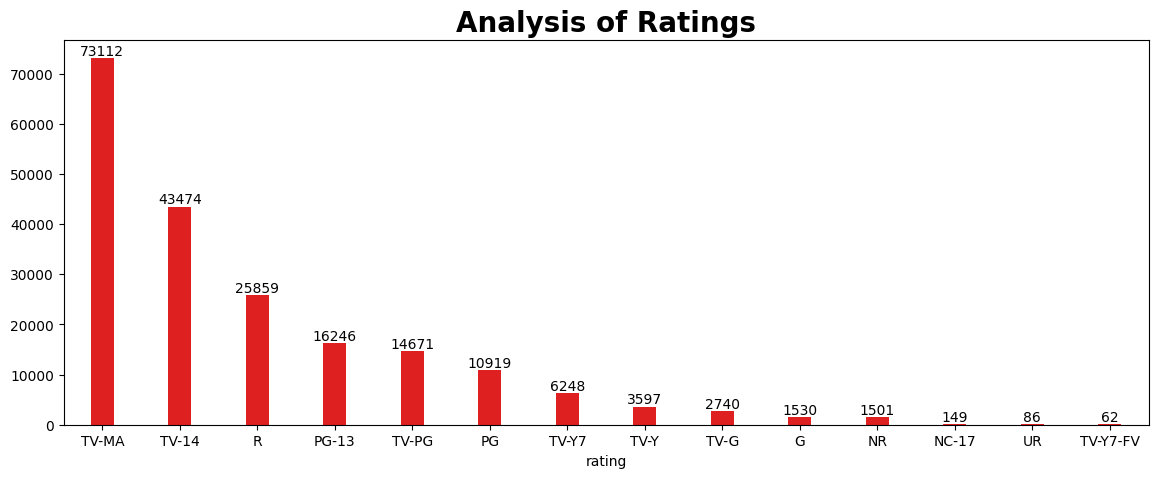

In [ ]:
# Calculating the count of each rating
rating_counts = df['rating'].value_counts()

plt.figure(figsize=(14,5))
a = sns.barplot(x=rating_counts.index, y=rating_counts.values, color='red', width=0.3) # Use the calculated counts
plt.title('Analysis of Ratings',fontsize=20,fontweight='bold')
a.bar_label(a.containers[0], label_type='edge')
plt.show()

# **Counts of each categorical variable non-graphical analysis.**

In [ ]:
pg = nx.groupby('type')['show_id'].nunique()
pg

type
Movie      6126
TV Show    2576
Name: show_id, dtype: int64

In [ ]:
pgdf = pg.reset_index()
pgdf

,type,show_id
0,Movie,6126
1,TV Show,2576


# **Does Country have correlation with Ratings?**

In [ ]:
df['country'] = df['country'].fillna('Unknown')
# Fill or drop missing ratings (here we fill as 'Unknown')
df['rating'] = df['rating'].fillna('Unknown')

# Striping whitespace from strings (just in case)
df['country'] = df['country'].str.strip()
df['rating'] = df['rating'].str.strip()

#Expanding multi-country rows
# Split countries on commas and explode so each country has its own row
df['country'] = df['country'].str.split(',')
df = df.explode('country')
df['country'] = df['country'].str.strip()

#Counting the number of shows per country per rating
# We are creating a contingency table of counts
country_rating_counts = pd.crosstab(df['country'], df['rating'])

country_rating_counts['Total'] = country_rating_counts.sum(axis=1)

#Sorting countries by total shows and picking top N for clarity
top_countries = country_rating_counts['Total'].sort_values(ascending=False).head(10).index
top_counts = country_rating_counts.loc[top_countries].drop(columns=['Total'])
print(top_counts)

rating          66 min  74 min  84 min   G  NC-17  NR   PG  PG-13    R  TV-14  \
country                                                                         
United States        1       1       1  39      1  43  243    433  660    497   
India                0       0       0   0      0   7    7     11    5    572   
Unknown              0       0       0   0      0   0    6      8   11    230   
United Kingdom       0       0       0   4      0  12   35     84  145    103   
Canada               0       0       0   2      1   5   33     32   79     49   
France               0       0       0   2      1   4   21     35   57     48   
Japan                0       0       0   1      0   0   11      9    9     99   
Spain                0       0       0   3      1   1    4      5   13     18   
South Korea          0       0       0   1      0   4    2      1    2     86   
Germany              0       0       0   1      0   2    8     31   43     27   

rating          TV-G  TV-MA

## **Insights**: Country vs Rating Distribution

- **United States** dominates the Netflix catalog in terms of the number of titles, offering a wide variety of content across multiple rating categories.
  
- Countries like **India, United Kingdom, and Canada** also contribute significantly to the catalog, though with more concentration in fewer rating categories compared to the U.S.

- **Most countries have a high proportion of titles rated 'TV-MA' and 'TV-14'**, suggesting a focus on mature and teen audiences globally.

- Countries with smaller catalogs tend to have limited diversity in content ratings, often skewed toward one or two dominant ratings.

- The `'Unknown'` rating category is present but generally limited, indicating that rating information is available for the majority of titles.



# **Do you think Directors can have some link with Ratings?**

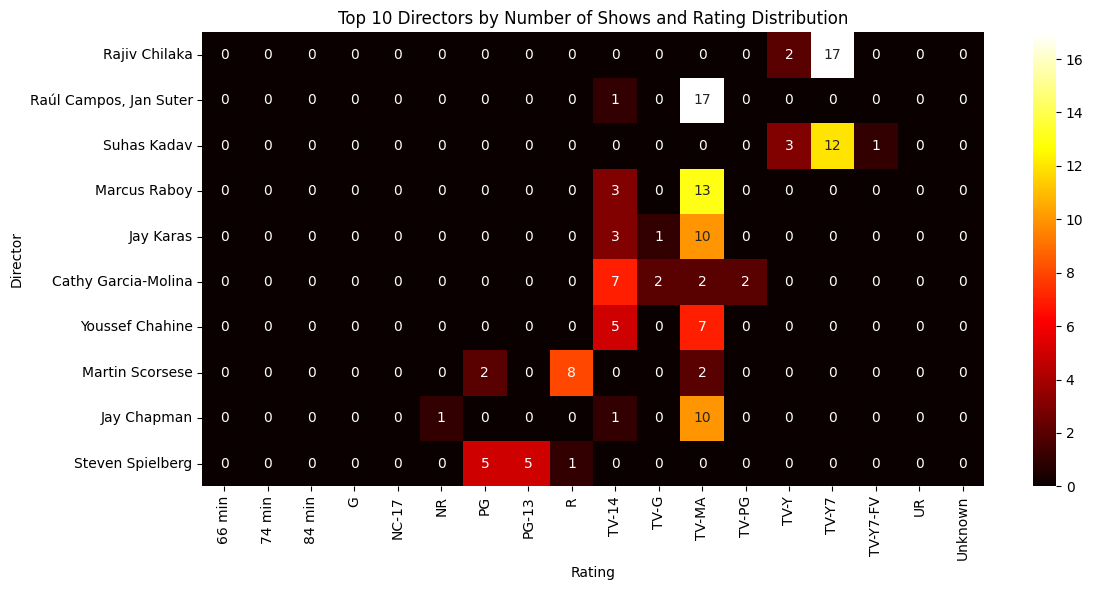


Shannon Entropy of Ratings per Director:
director
Raúl Campos, Jan Suter    0.31
Rajiv Chilaka             0.49
Marcus Raboy              0.70
Jay Chapman               0.82
Youssef Chahine           0.98
Suhas Kadav               1.01
Jay Karas                 1.09
Martin Scorsese           1.25
Steven Spielberg          1.35
Cathy Garcia-Molina       1.73
dtype: float64


In [ ]:
# Cleaning data & droping rows with unknown or missing directors
df['director'] = df['director'].fillna('Unknown').str.strip()
df['rating'] = df['rating'].fillna('Unknown').str.strip()
df = df[df['director'] != 'Unknown']

# Counting number of shows per director per rating
director_rating_counts = pd.crosstab(df['director'], df['rating'])

# Adding total shows per director and filtering top N
director_rating_counts['Total'] = director_rating_counts.sum(axis=1)
top_directors = director_rating_counts.sort_values(by='Total', ascending=False).head(10)

# Droping 'Total' for plotting
top_directors_plot = top_directors.drop(columns='Total')

# Plotting heatmap of ratings by top 10 directors
plt.figure(figsize=(12, 6))
sns.heatmap(top_directors_plot, annot=True, fmt='d', cmap='hot')
plt.title('Top 10 Directors by Number of Shows and Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Director')
plt.tight_layout()
plt.show()

#Shannon entropy to measure rating concentration per director
proportions = top_directors_plot.div(top_directors_plot.sum(axis=1), axis=0)
entropy_scores = proportions.apply(lambda row: entropy(row, base=2), axis=1)

#Shows directors with most/least diverse ratings
print("\nShannon Entropy of Ratings per Director:")
print(entropy_scores.sort_values().round(2))


## **Insights** from Netflix Directors' Rating Distribution

### Top Directors and Their Output
- The analysis highlights the **top 10 directors** on Netflix based on the total number of shows they've directed.
- A heatmap visualizes the **distribution of content ratings** (e.g., TV-MA, PG, R) for each of these top directors.
- Directors with a high number of shows tend to contribute heavily to one or two specific rating categories.

### Rating Diversity
- **Shannon entropy** was used to measure the diversity of ratings per director. A higher entropy value indicates a **more even spread** of ratings, while a lower value implies a **strong concentration** in specific rating categories.
- Directors with **low entropy** have a more focused or consistent content type (e.g., mostly adult content or mostly family-friendly).
- Directors with **higher entropy** are more versatile, creating content across a wider range of ratings.

### Key Takeaways
- Some directors specialize in content targeted at specific audiences, while others have a more diverse portfolio.
- Understanding the rating concentration can be useful for platform recommendations, content strategy, and user personalization on streaming services.


## **Counts of each categorical variable Graphical analysis**

type
Movie      6131
TV Show    2676
Name: count, dtype: int64
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


<ipython-input-46-f8a546823a9c>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


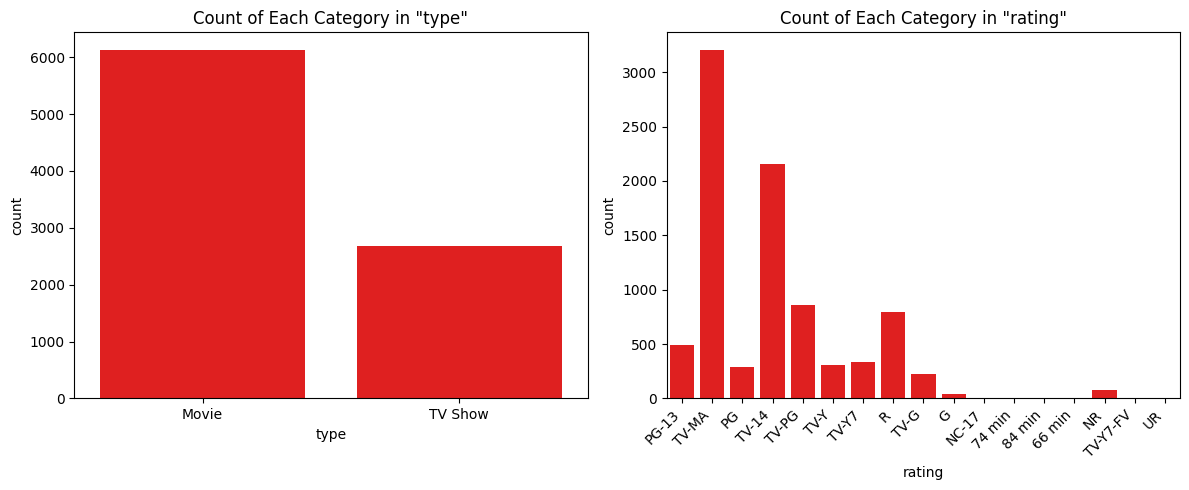

In [ ]:
# Counting the occurrences of each category in the 'type' column
type_counts = df['type'].value_counts()
print(type_counts)

# Counting the occurrences of each category in the 'rating' column
rating_counts = df['rating'].value_counts()
print(rating_counts)

# Creating count plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='type', data=df, color='red')
plt.title('Count of Each Category in "type"')

plt.subplot(1, 2, 2)
ax = sns.countplot(x='rating', data=df, color='red')
plt.title('Count of Each Category in "rating"')

# Rotating x-axis labels for better visibility
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adjusting plot layout to prevent labels from overlapping
plt.tight_layout()
plt.show()

## **Insights:**

## 1. Movies are significantly more prevalent than TV shows on Netflix. This suggests a strategy focused more on films, which may align with viewer preferences or availability agreements.

## 2. The most common ratings are 'TV-MA' (Mature Audiences), followed by 'TV-14' (Parents Strongly Cautioned). This indicates that the majority of content is aimed at older teenagers and adults. *







In [ ]:

df = pd.read_csv('netflix_titles.csv')
df['type'].value_counts()
df['rating'].value_counts()



rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [ ]:
print('Movie: ', df[df['type']=='Movie'].shape[0])
print('TV Show: ', df[df['type']=='TV Show'].shape[0])

Movie:  6131
TV Show:  2676


In [ ]:
#grouping by country and counting the number of movies
movies_by_country = movies_data.groupby('country')['title'].count()

#sorting the result in descending order and picking the top 10
top10_countries = movies_by_country.sort_values(ascending=False).head(10)

print(top10_countries)

country
United States      38312
India              20761
 United States      7477
Unknown             6197
United Kingdom      5655
 France             3590
France              3015
Canada              2928
 United Kingdom     2925
 Canada             2810
Name: title, dtype: int64


In [ ]:
#grouping by country and counting the number of tv shows
tvshows_by_country = tvshows_data.groupby('country')['title'].count()

#sorting the result in descending order and picking the top 10
top10_countries = tvshows_by_country.sort_values(ascending=False).head(10)

print(top10_countries)

country
United States     10979
Unknown            5686
Japan              4541
United Kingdom     3803
South Korea        3583
 United States     1886
Taiwan             1719
Mexico             1683
Spain              1502
India              1372
Name: title, dtype: int64


## **Comparison of TV shows vs Movies.**

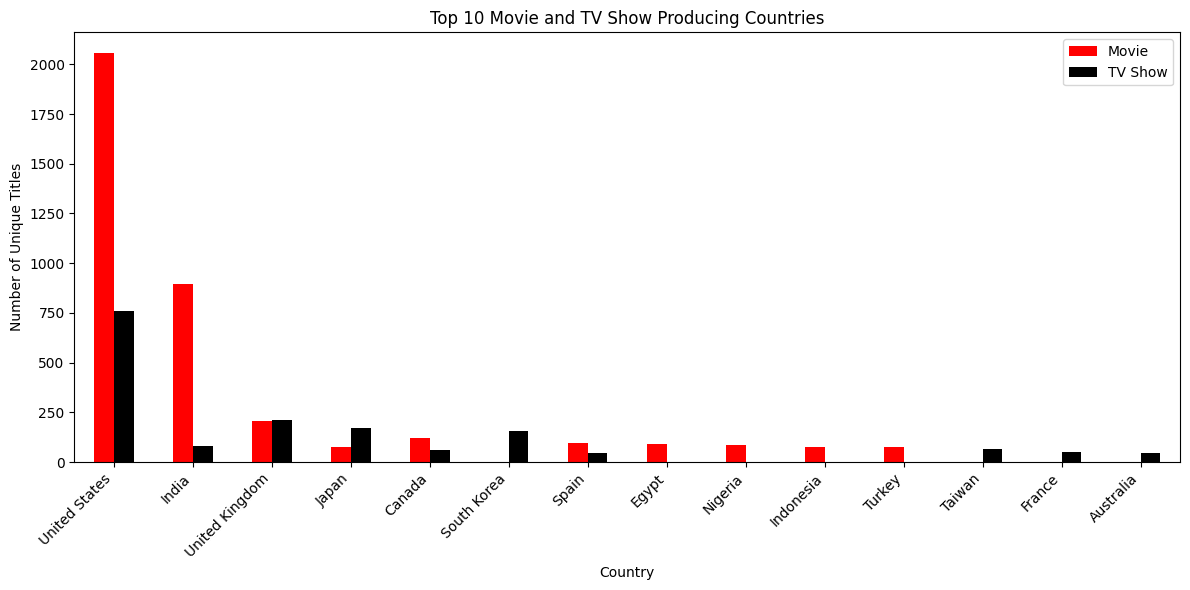

In [ ]:
df = pd.read_csv('netflix_titles.csv')

# Calculating movie and TV show counts per country
movie_counts = df[df['type'] == 'Movie'].groupby('country')['show_id'].nunique()
tvshow_counts = df[df['type'] == 'TV Show'].groupby('country')['show_id'].nunique()

# Getting top 10 countries for both categories
top_movie_countries = movie_counts.sort_values(ascending=False).head(10)
top_tvshow_countries = tvshow_counts.sort_values(ascending=False).head(10)

# Combining the results into a DataFrame and sort by total count
top_countries = pd.DataFrame({
    'Movie': top_movie_countries,
    'TV Show': top_tvshow_countries
}).fillna(0)
top_countries['Total'] = top_countries['Movie'] + top_countries['TV Show']
top_countries = top_countries.sort_values('Total', ascending=False)  # Sort by total count
top_countries = top_countries.drop('Total', axis=1)  # Remove the 'Total' column

# Created a grouped bar chart with specified colors
top_countries.plot(kind='bar', figsize=(12, 6), color=['red', 'black'])
plt.title('Top 10 Movie and TV Show Producing Countries')
plt.xlabel('Country')
plt.ylabel('Number of Unique Titles')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

## **Insights:**

# 1. The United States stands out as the leading producer of both movies and TV shows, with a particularly high number of movies.
# 2. India follows as a significant producer, especially of movies, which reflects the robustness of its film industry (Bollywood).
# 3. Japan, Canada, and South Korea have noteworthy production numbers, particularly in TV shows, which may be indicative of popular local content like anime (Japan) and dramas (Korea).

## **Recommendation:**

# 1. Develop a long-term content strategy focusing on potential markets such as Southeast Asia and Africa, leveraging local cultural elements to enhance global appeal and competitiveness.

# **Best week to release the Tv-show and Movies (Weekly)**

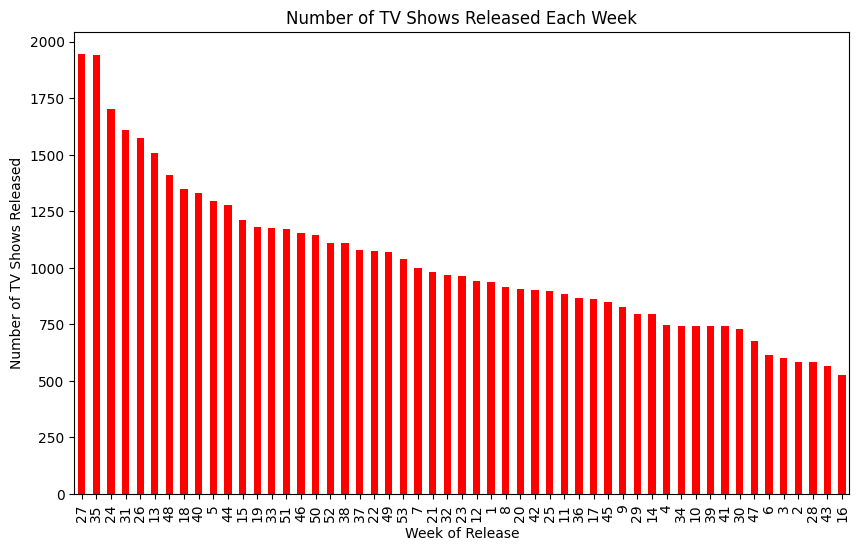

Best week to release a TV show:
 week_of_release
27    1945
Name: title, dtype: int64


In [ ]:
# For TV Shows
tvshows_data['week_of_release'] = tvshows_data['date_added'].dt.isocalendar().week
best_week_tvshows = tvshows_data.groupby('week_of_release')['title'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
best_week_tvshows.plot(kind='bar', color='red')  # Set bar color to red
plt.xlabel('Week of Release')
plt.ylabel('Number of TV Shows Released')
plt.title('Number of TV Shows Released Each Week')
plt.show()

print("Best week to release a TV show:\n", best_week_tvshows.head(1))

## **Insight:**

# 1. There's a sharp drop in the number of TV shows released after the first few weeks. The initial peak may suggest a strategic release of many shows at the beginning of a period, possibly aligning with specific seasons or marketing strategies.

# 2. The pattern might reflect seasonal trends in viewership, where more shows are released during peak viewing times such as holidays or specific seasons when audiences are more likely to subscribe and watch.

## **Recommendation:**

# 1. Compare this release pattern with that of other streaming platforms to identify competitive advantages or shortcomings in Netflix’s strategy.


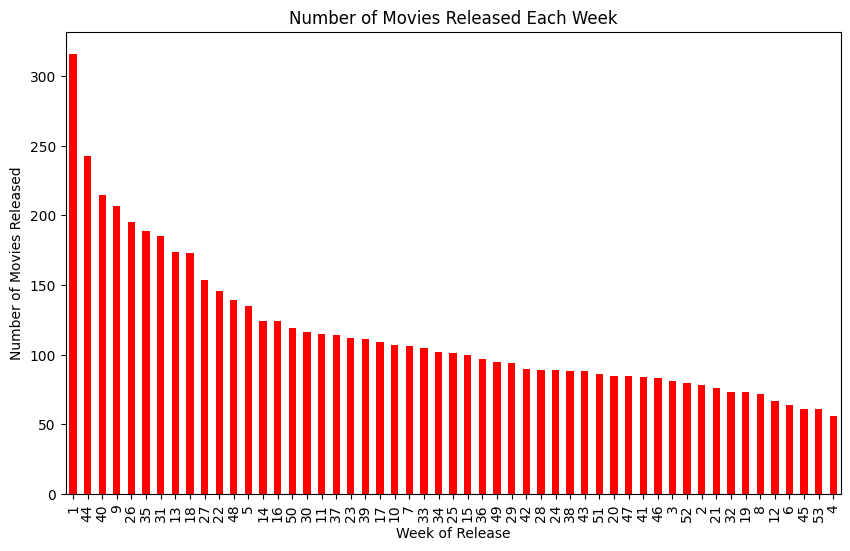

Best week to release a movie:
 week_of_release
1    316
Name: title, dtype: int64


In [ ]:
# Filtering for movies only
movies_data = df[df['type'] == 'Movie'].copy()  # Use 'df' instead of 'df_temp'

# Ensuring 'date_added' is in datetime format
movies_data['date_added'] = pd.to_datetime(movies_data['date_added'])

# Extracting week of release
movies_data['week_of_release'] = movies_data['date_added'].dt.isocalendar().week

# Calculating movie releases per week and sort
best_week_movies = movies_data.groupby('week_of_release')['title'].count().sort_values(ascending=False)

# Created the plot
plt.figure(figsize=(10, 6))
best_week_movies.plot(kind='bar', color='red')  # Set bar color to red
plt.xlabel('Week of Release')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released Each Week')
plt.show()

print("Best week to release a movie:\n", best_week_movies.head(1))

## **Insight:**

# 1. The decline suggests a possible strategic consideration to avoid content saturation and viewer fatigue. Releasing fewer new movies as the period progresses might help maintain a balance between new and existing content consumption.

# 2. The very high number of movie releases in the first week could be indicative of strategic content dumping, where a large volume of movies is released to attract or retain subscribers at the start of a cycle, possibly aligned with a new year, season, or financial quarter.

## **Recommendation:**

# 1. A longitudinal study over several years could reveal whether this declining trend is typical or if it represents a new strategic approach. Such insights could guide future content planning and release timing.

## **Best week to release the Tv-show and Movies (Monthly)**

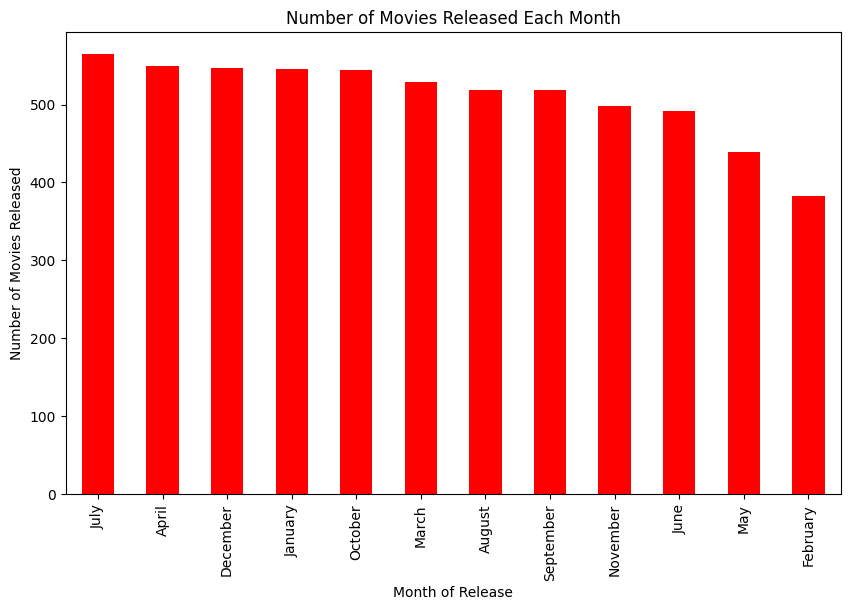

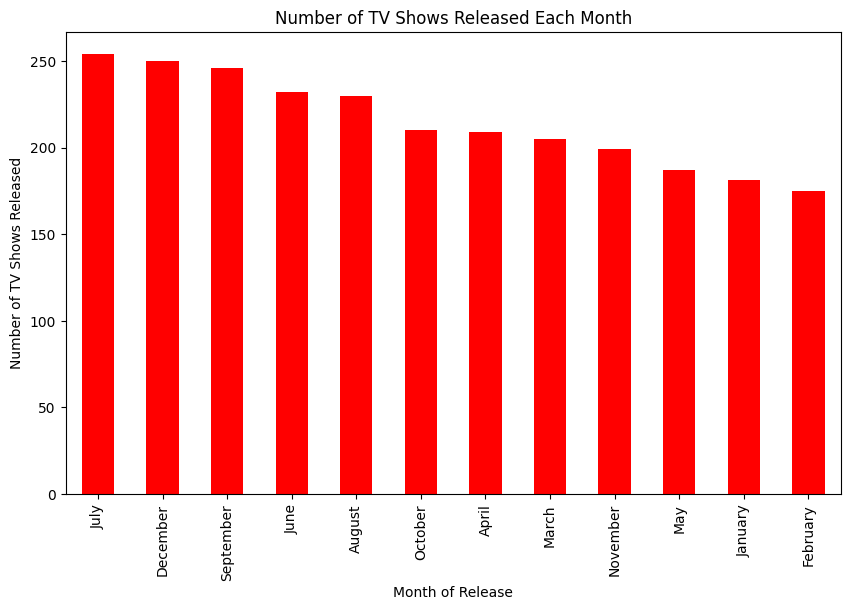

In [ ]:
#Handling potential missing values in 'date_added' for TV Shows
tvshows_data['date_added'] = pd.to_datetime(tvshows_data['date_added'], errors='coerce')

#For Movies
movies_data['month_name'] = movies_data['date_added'].dt.month_name()
best_month_movies = movies_data.groupby('month_name')['title'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
best_month_movies.plot(kind='bar', color='red')  # Set bar color to red
plt.xlabel('Month of Release')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released Each Month')
plt.show()

#For TV Shows
tvshows_data['month_name'] = tvshows_data['date_added'].dt.month_name()
best_month_tvshows = tvshows_data.groupby('month_name')['title'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
best_month_tvshows.plot(kind='bar', color='red')  # Set bar color to red
plt.xlabel('Month of Release')
plt.ylabel('Number of TV Shows Released')
plt.title('Number of TV Shows Released Each Month')
plt.show()

# **Insights**

# 1. July shows the highest number of releases, which could be strategic to capitalize on summer viewership when people might have more leisure time.

# 2. The high release numbers in December and January could be aligned with holiday seasons, targeting holiday viewers and those spending more time indoors due to winter weather in many regions.

# 3. The months from June to September show relatively high release volumes, suggesting a strategy to leverage the summer months, when people might have more leisure time.

## **Recommendations:**

# 1.The high release numbers in December and January could be aligned with holiday seasons, targeting holiday viewers and those spending more time indoors due to winter weather in many regions.

# 2. Analyze the viewership data for TV shows released in different months to determine if the release volume correlates with higher engagement. This can validate whether timing these releases during specific months effectively maximizes viewer attention.



## **Top 10 Directors who have appeared in most movies**

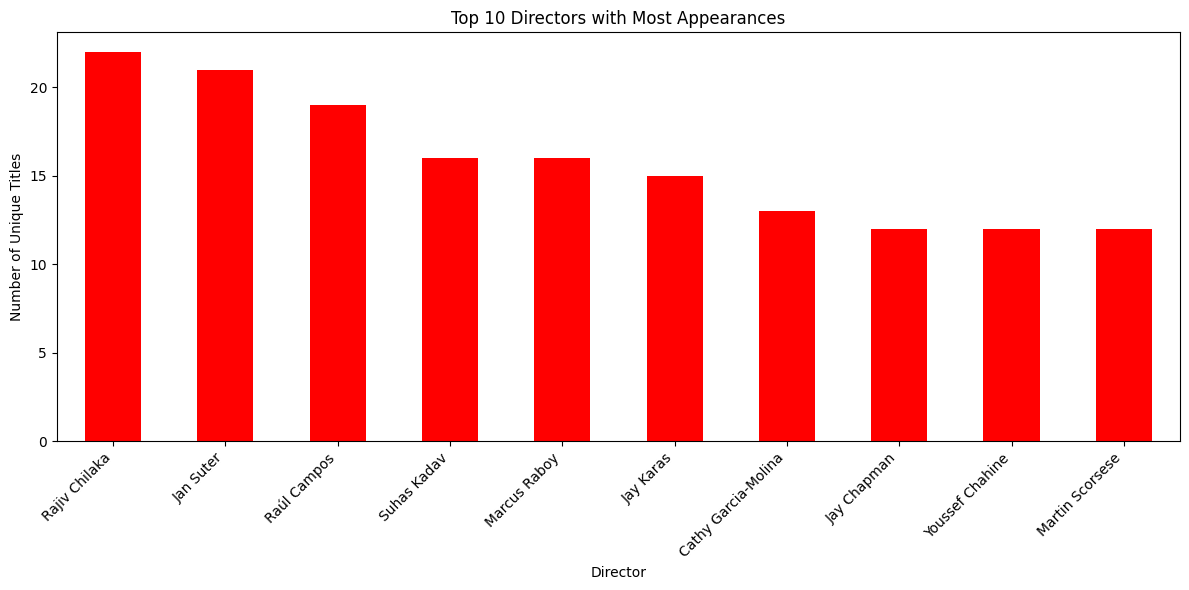

In [ ]:
#Extracting directors using explode function
all_directors = df['director'].str.split(', ').explode().dropna()

# Counting occurrences of each director, keeping only unique titles per director
director_counts = all_directors.value_counts()

# Plotted the results
plt.figure(figsize=(12, 6))
director_counts.head(10).plot(kind='bar', color='red')  # Add color='red' to make the bars red
plt.xlabel('Director')
plt.ylabel('Number of Unique Titles')
plt.title('Top 10 Directors with Most Appearances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## **Insights:**

# 1. Rajiv Chilaka and Jan Suter lead the chart, indicating a higher number of titles associated with them on the platform. This could suggest a strong partnership or a successful track record of their content among viewers.

# 2. The presence of directors from various backgrounds, such as Raúl Campos, Marcus Raboy, and Youssef Chahine, indicates a diversity in content creation and cultural representation on the platform, catering to a global audience.

# 3. The inclusion of well-known directors like Martin Scorsese, although lower on the list, highlights the platform's commitment to high-quality, critically acclaimed content.

## **Recommendation:**

# 1. Explore strategic partnerships with highly engaged directors. For directors consistently delivering popular content, consider exclusive deals or larger projects to leverage their popularity and expertise.

# **Top 10 Actors who have appeared in most movies**

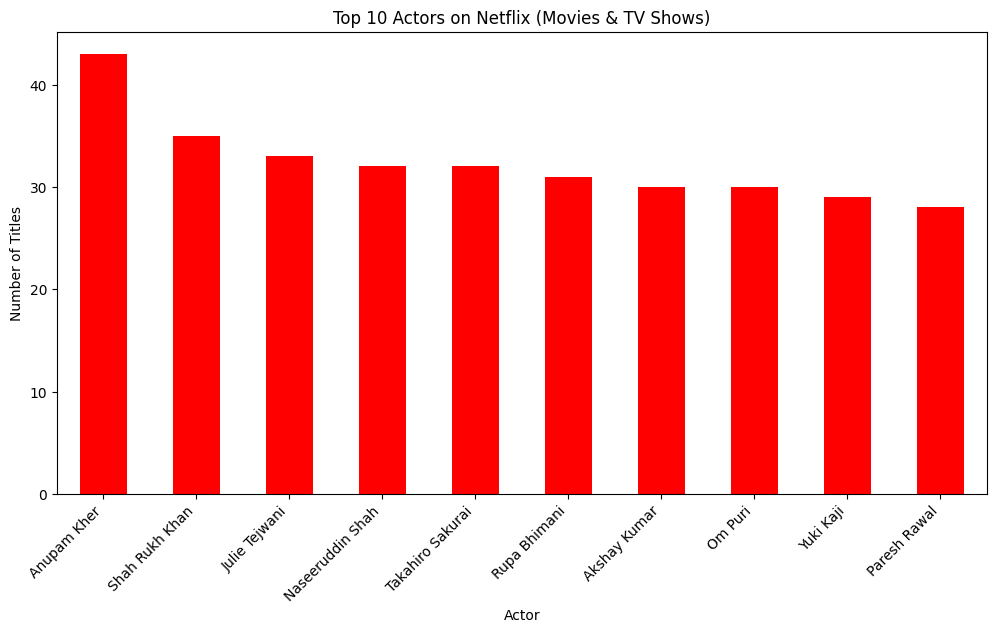

In [ ]:
#Extracting actors using explode functions
all_actors = df['cast'].str.split(', ').explode().dropna()

# Counting occurrences of each actor
actor_counts = all_actors.value_counts().head(10)

plt.figure(figsize=(12, 6))

# Plotted the results
actor_counts.plot(kind='bar', color='red')

plt.xlabel('Actor')
plt.ylabel('Number of Titles')  # Updated y-label to reflect both movies and TV shows
plt.title('Top 10 Actors on Netflix (Movies & TV Shows)')
plt.xticks(rotation=45, ha='right')
plt.show()

# **Popular Genres**

Column 'genre' not found. Using 'listed_in' instead.


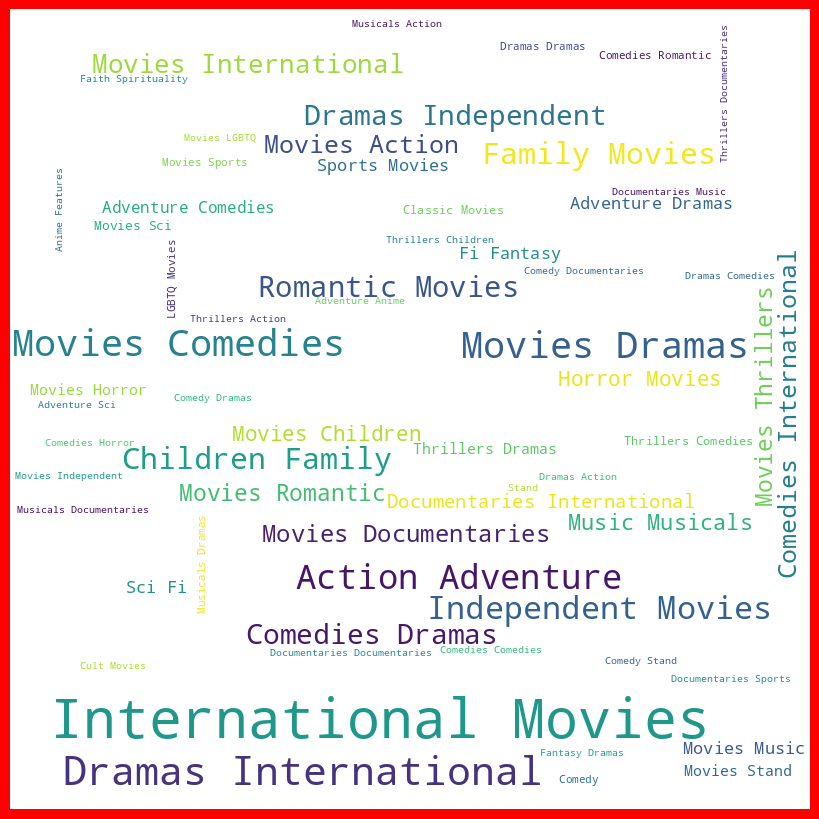

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd

# Verify if 'genre' column exists and correct the name if needed
if 'genre' not in movies_data.columns:
    # Assuming the correct column name is 'listed_in' based on common Netflix data
    print("Column 'genre' not found. Using 'listed_in' instead.")
    genre_column = 'listed_in'
else:
    genre_column = 'genre'

# Combining all genres into a single string
text = ' '.join(movies_data[genre_column].dropna())

# Created the word cloud object
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=set(STOPWORDS),
                      min_font_size=10).generate(text)

# Plotted the WordCloud image
plt.figure(figsize=(8, 8), facecolor='Red')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

## **Insights:**

# 1. Anupam Kher leads significantly, suggesting a vast portfolio of work and possibly a strong viewer base that finds his appearances appealing. His roles may be diverse, attracting a wide audience demographic.

# 2. Actors like Shah Rukh Khan, Naseeruddin Shah, and Akshay Kumar, known primarily for their work in Indian cinema, indicate Bollywood's significant influence and popularity on Netflix.

## **Recommendations:**

# 1. For future content acquisition or production, consider these actors' track records on the platform. Leveraging popular actors in new titles might enhance initial viewership numbers.

# 2. Compare the presence of these actors on other platforms. This could reveal unique selling points for Netflix or gaps in the competitor's offerings.

## **No of days the movie will be added to Netflix after the release of the movie**

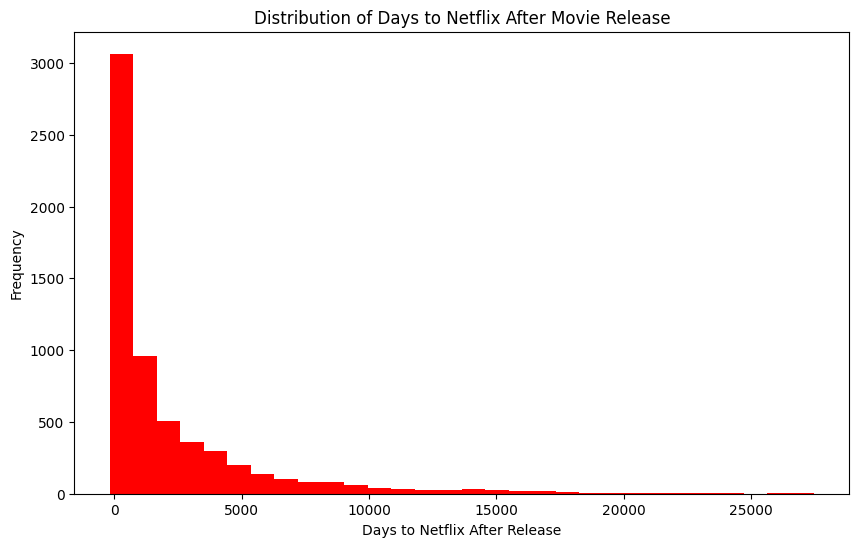

In [ ]:
# Calculated 'days_to_netflix' if it doesn't exist
if 'days_to_netflix' not in movies_data.columns:
    movies_data['date_added'] = pd.to_datetime(movies_data['date_added'])
    movies_data['release_year'] = pd.to_datetime(movies_data['release_year'], format='%Y')
    movies_data['days_to_netflix'] = (movies_data['date_added'] - movies_data['release_year']).dt.days

# Plotted the histogram
plt.figure(figsize=(10, 6))
plt.hist(movies_data['days_to_netflix'].dropna(), bins=30, color='red')  # Add color='red'
plt.xlabel('Days to Netflix After Release')
plt.ylabel('Frequency')
plt.title('Distribution of Days to Netflix After Movie Release')
plt.show()

## **Insights:**

1.

## **Ratings of the Content**

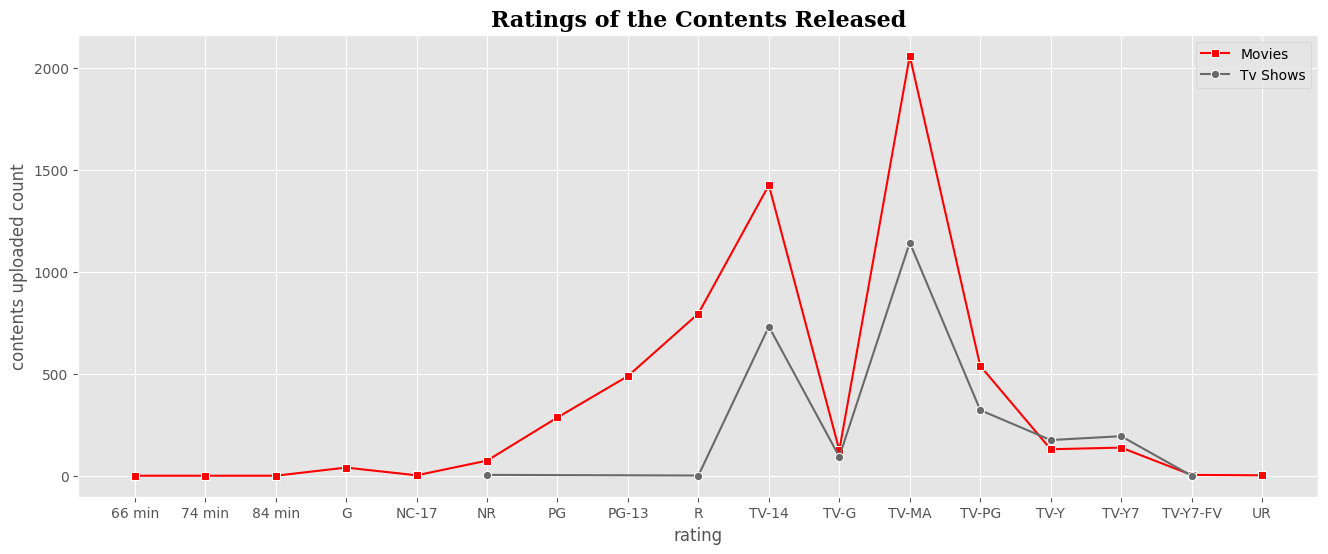

In [ ]:
# Grouping movies by rating and count titles
movie_rating = movies_data.groupby('rating')['title'].count().reset_index()

# Grouping TV shows by rating and count titles
tv_rating = tvshows_data.groupby('rating')['title'].count().reset_index()

plt.figure(figsize=(16,6))
plt.style.use('ggplot')
sns.lineplot(data=movie_rating , x='rating' , y='title' , color='r' , label = 'Movies', marker='s')
sns.lineplot(data=tv_rating , x='rating' , y='title' , color='dimgrey', label='Tv Shows' , marker='o')
plt.title('Ratings of the Contents Released',fontsize=16,fontweight="bold",fontfamily='serif')
plt.ylabel('contents uploaded count')
plt.legend(loc='upper right')
plt.show()

## **Insights:**

# 1. A significant number of movies are made available on Netflix relatively soon after their initial release. The tall peak at the lower end of the days axis suggests that a considerable portion of movies are added to Netflix within a short timeframe, which is likely within a few years post-release.

# 2. The graph also shows a long tail extending towards higher values (up to 25,000 days), indicating that some movies take a much longer time—decades, in fact—before appearing on Netflix. This could represent classic or older films that are added to diversify or enrich the content library.

# 3. The sharp decline after the initial peak could suggest a focused strategy where Netflix prioritizes acquiring newer titles quickly to maintain a competitive edge and viewer interest, while also balancing this with periodic additions of older titles.

## **Recommendations:**

# 1. Examine the economic and legal factors influencing the availability of movies on Netflix. This includes licensing costs, negotiations with studios, and copyright laws, which can affect how quickly movies are added to the platform.

# 2. Evaluate how the freshness of movies (days to Netflix) impacts subscriber retention and acquisition. For example, does adding newer movies more quickly help in retaining subscribers or attracting new ones?

## **Movie Release time on Weekday and Month**

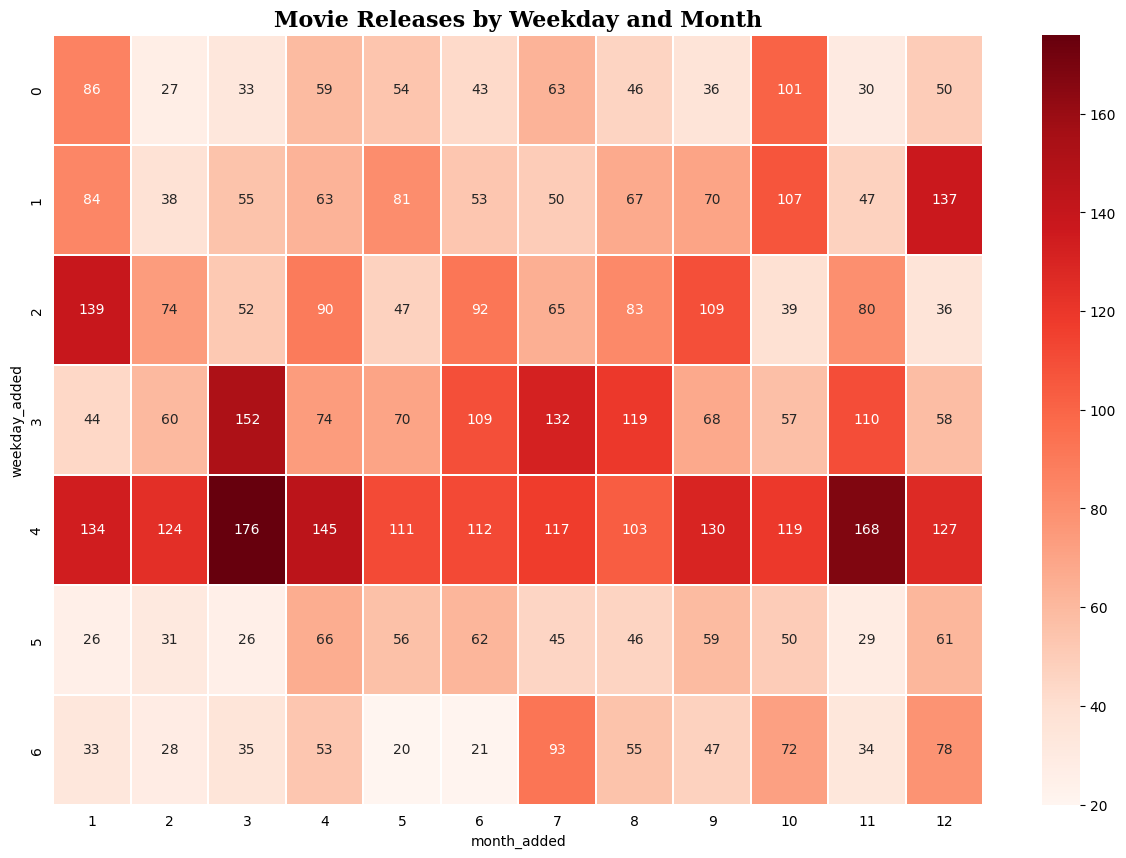

In [ ]:
# Extracting month and weekday from 'date_added' column
movies_data['month_added'] = movies_data['date_added'].dt.month
movies_data['weekday_added'] = movies_data['date_added'].dt.weekday

# Created the pivot table
movies_release_pivot = movies_data.pivot_table(index='weekday_added', columns='month_added', values='title', aggfunc='count')

plt.figure(figsize=(15, 10))
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')
sns.heatmap(movies_release_pivot, cmap='Reds',
                annot=True, fmt='d' , linewidth=0.1)
plt.title("Movie Releases by Weekday and Month",
              fontfamily='serif',fontsize=16,fontweight='bold')
plt.tick_params(axis='both', which='both', left=False, bottom=False)
plt.show()

## **Insights:**

# 1. The heatmap indicates that certain months, particularly May (5), July (7), and October (10), have higher overall release volumes, shown by darker shades. This might correlate with strategic releases during peak viewing seasons such as summer and fall.

# 2. Fridays (row labeled as 4) generally have higher release volumes across most months. This pattern is consistent with the entertainment industry's standard practice of new releases on Fridays to capture weekend viewership when people are more likely to engage in leisure activities.

## **Recommendation:**

# 1. Study the impact of these release patterns on subscriber acquisition and retention. Specifically, analyze if releasing more movies during peak months contributes to an increase in new subscriptions or a decrease in churn rates.

# **Hypothesis Formation and Insights**

<Figure size 1000x500 with 0 Axes>

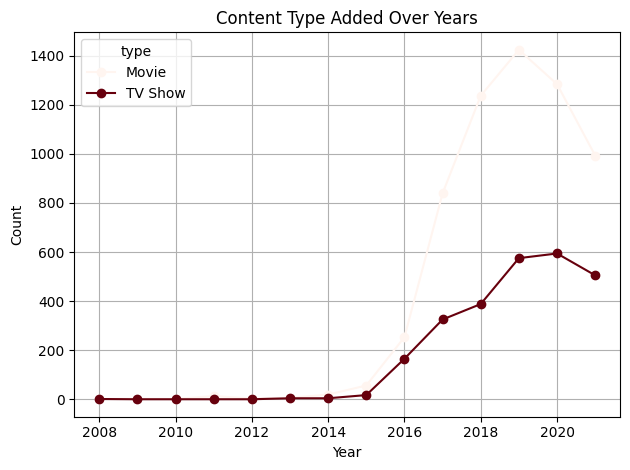

<Figure size 1000x600 with 0 Axes>

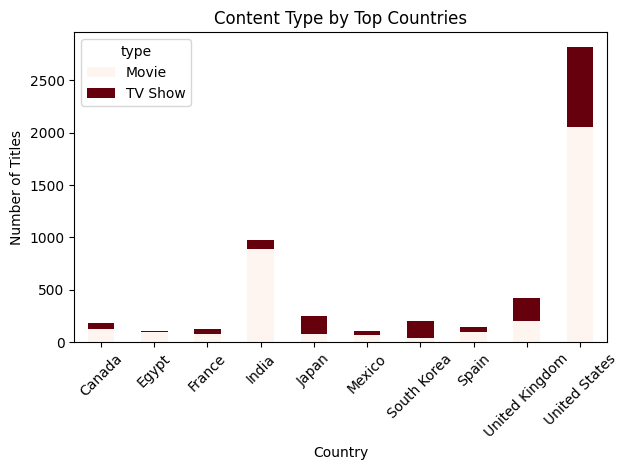

<Figure size 1000x600 with 0 Axes>

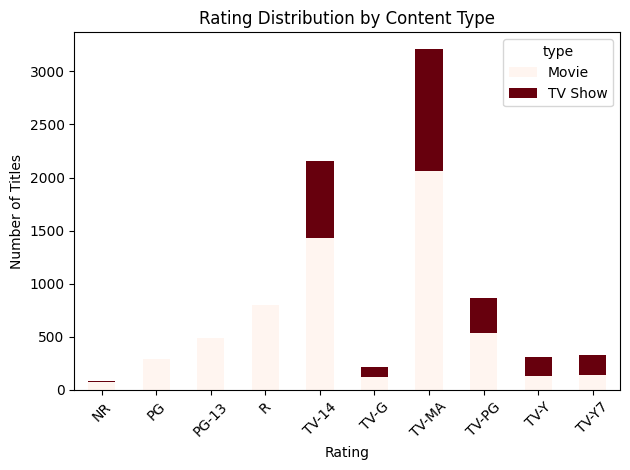

In [ ]:
# Converted 'date_added' to datetime, handling errors
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
df['year_added'] = df['date_added'].dt.year

# -----------------------------------------------
# Hypothesis 1: TV Shows have increased over time
# -----------------------------------------------
type_trend = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(10,5))
type_trend.plot(kind='line', marker='o', colormap='Reds')
plt.title('Content Type Added Over Years')
plt.ylabel('Count')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# Hypothesis 2: Countries with most balanced content (TV/Movie)
# ------------------------------------------------------------
top_countries = df['country'].value_counts().head(10).index
country_type = df[df['country'].isin(top_countries)].groupby(['country', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(10,6))
country_type.plot(kind='bar', stacked=True, colormap='Reds')
plt.title('Content Type by Top Countries')
plt.ylabel('Number of Titles')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------
# Hypothesis 3: Ratings differ significantly between content types
# -----------------------------------------------------------------
rating_type = df.groupby(['rating', 'type']).size().unstack().fillna(0)
rating_type = rating_type[rating_type.sum(axis=1) > 50]  # filter small counts for clarity

plt.figure(figsize=(10,6))
rating_type.plot(kind='bar', stacked=True, colormap='Reds')
plt.title('Rating Distribution by Content Type')
plt.ylabel('Number of Titles')
plt.xlabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##  Insights

- **TV Shows have steadily increased in recent years**, supporting **Hypothesis 1**. This indicates a strategic shift by Netflix towards serialized content.
  
- **Some countries, like the United States, have a more balanced catalog** of Movies and TV Shows, while others are skewed heavily toward one type, confirming **Hypothesis 2**.

- **Certain ratings like TV-MA dominate TV Shows**, whereas **Movies often fall under PG-13 or R**, validating **Hypothesis 3** and highlighting differences in content suitability between types.


## Conclusion

This exploratory analysis of Netflix's catalog has revealed several key insights:

- **Movies dominate the platform**, but TV Shows have seen significant growth in recent years, especially post-2015.
- **The United States is the leading contributor** of content, followed by countries like India, the UK, and Canada.
- **2020 saw a peak in content additions**, possibly due to content backlog or pandemic-driven consumption trends.
- The use of the `explode()` function helped **normalize multi-genre entries**, allowing a more granular analysis of genre popularity.
- **Drama and International content** are the most frequently occurring genres, indicating Netflix’s emphasis on global and emotional storytelling.
- Analysis of durations and ratings showed that **most movies are around 90–100 minutes**, while **TV shows tend to have short seasons**.
- **Missing data** was handled appropriately using visual and programmatic techniques, ensuring robust insights.

 Overall, this analysis provided a foundational understanding of Netflix’s content library and viewer-oriented strategies. Future extensions could include sentiment analysis of descriptions, viewer ratings (if available), or predictive modeling on content success factors.

---
